# Sentiment Analysis Notebook

To run: modify file path to dataset you want to run this on \
File is expected to be a csv with a column containing tweets (column name can be specified)

Code taken from:
https://www.kaggle.com/code/adarshcgowda/comprehensive-sentiment-analysis-guide

## Loading Data

In [1]:
#For basic table operation
import pandas as pd

#For work with arrays
import numpy as np

#For find pattern in text
import re

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#For processing textial data
from textblob import TextBlob

import nltk
nltk.download('stopwords')
nltk.download('punkt')

#For Tokenizing segments
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer

#For removing StopWords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#For Plotting Words
from wordcloud import WordCloud

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#For Hyper-tuning model
from sklearn.model_selection import GridSearchCV

/home/lx2030/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lx2030/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/lx2030/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lx2030/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
[nltk_data] Downloading package stopwords to /home/lx2030/nltk_data...
[nltk_data]   Package stopwords is already up-t

In [2]:
teams = ['atlanta_hawks', 'boston_celtics', 'brooklyn_nets', 'charlotte_hornets',
         'chicago_bulls', 'cleveland_cavaliers', 'detroit_pistons', 'indiana_pacers', 'toronto_raptors', 'dallas_mavericks', 'denver_nuggets',
         'miami_heat', 'milwaukee_bucks', 'new_york_knicks', 'orlando_magic', 'philadelphia_76ers', 'washington_wizards', 'golden_state_warriors', 'houston_rockets',
         'los_angeles_clippers', 'los_angeles_lakers',
          'memphis_grizzlies', 'minnesota_timberwolves', 'new_orleans_pelicans', 'oklahoma_city_thunder', 'phoenix_suns', 'portland_trail_blazers', 'sacramento_kings'
          , 'san_antonio_spurs', 'utah_jazz']
tweets = list()
# team_names = list()
df_by_team = pd.DataFrame()
for team in teams:
    file_path = "../twitter_data/tweets_" + team + ".csv"
    column_name = "Tweet"
    file = open(file_path, 'r')
    lines = file.readlines()
    tweets.extend([[team,line.strip()] for line in lines[1:]])
#     tweets.extend(lines[1:])
#     team_names.extend([team for i in range(len(lines[1:]))])
    file.close()
    df_tmp = pd.read_csv(file_path,header=0)
    df_by_team[team] = df_tmp["Content"]

df = pd.DataFrame(tweets,columns=["Team","Tweet"])

In [3]:
# df = pd.read_csv(file_path)

df.head()

,Team,Tweet
0,atlanta_hawks,pic.twitter.com/Gi9nwxSBLx
1,atlanta_hawks,"""(Ep. 284/ATL and 29) HaWWWks"
2,atlanta_hawks,
3,atlanta_hawks,"podcasters.spotify.com/pod/show/atlan…"""
4,atlanta_hawks,Hawks’ coming trip provides ‘a good barometer’...


In [4]:
df.shape

(2622, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    2622 non-null   object
 1   Tweet   2622 non-null   object
dtypes: object(2)
memory usage: 41.1+ KB


## Data Preprocessing

In [6]:
def data_processing(text):
    text = text.lower()     #Converting to text to lowercase
    text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE)   #Removing URL
    text = re.sub(r'\@w+|\#','',text)         #Removing hashtags
    text = re.sub(r'[^\w\s]','',text)         #Removing hashtags
    text_tokens = word_tokenize(text)         #Getting tokens
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [7]:
df[column_name] = df[column_name].apply(data_processing)
text_df = df

In [8]:
#Checking data shape
print("Shape of data after processing:",text_df.shape)

Shape of data after processing: (2622, 2)


In [9]:
#calculating polarity for categorizing text 
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
text_df.head()

,Team,Tweet
0,atlanta_hawks,pictwittercomgi9nwxsblx
1,atlanta_hawks,ep 284atl 29 hawwwks
2,atlanta_hawks,
3,atlanta_hawks,podcastersspotifycompodshowatlan
4,atlanta_hawks,hawks coming trip provides good barometer ajcc...


In [11]:
text_df["polarity"] = text_df[column_name].apply(polarity)
text_df.head(10)

,Team,Tweet,polarity
0,atlanta_hawks,pictwittercomgi9nwxsblx,0.0000
1,atlanta_hawks,ep 284atl 29 hawwwks,0.0000
2,atlanta_hawks,,0.0000
3,atlanta_hawks,podcastersspotifycompodshowatlan,0.0000
4,atlanta_hawks,hawks coming trip provides good barometer ajcc...,0.7000
5,atlanta_hawks,hawks say rookie kobe bufkin miss next two wee...,0.0000
6,atlanta_hawks,hawks injury report saturday pelicans pictwitt...,0.0000
7,atlanta_hawks,hawks say rookie kobe bufkin left thumb injury...,0.0000
8,atlanta_hawks,weeks hawks report dsallerson chat hawks 3game...,0.2625
9,atlanta_hawks,,0.0000


In [12]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [13]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head(10)

,Team,Tweet,polarity,sentiment
0,atlanta_hawks,pictwittercomgi9nwxsblx,0.0000,Neutral
1,atlanta_hawks,ep 284atl 29 hawwwks,0.0000,Neutral
2,atlanta_hawks,,0.0000,Neutral
3,atlanta_hawks,podcastersspotifycompodshowatlan,0.0000,Neutral
4,atlanta_hawks,hawks coming trip provides good barometer ajcc...,0.7000,Positive
5,atlanta_hawks,hawks say rookie kobe bufkin miss next two wee...,0.0000,Neutral
6,atlanta_hawks,hawks injury report saturday pelicans pictwitt...,0.0000,Neutral
7,atlanta_hawks,hawks say rookie kobe bufkin left thumb injury...,0.0000,Neutral
8,atlanta_hawks,weeks hawks report dsallerson chat hawks 3game...,0.2625,Positive
9,atlanta_hawks,,0.0000,Neutral


In [14]:
import os
os.chdir("plots")

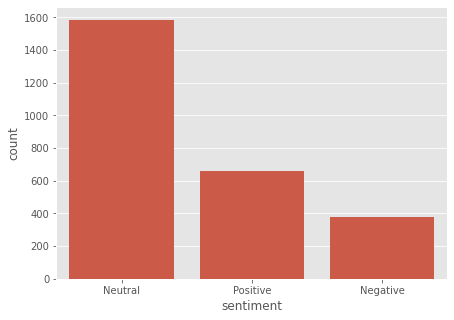

In [15]:
#Visualizing the Sentiment
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=text_df)
plt.savefig("all_sentiment_count_bar.png")

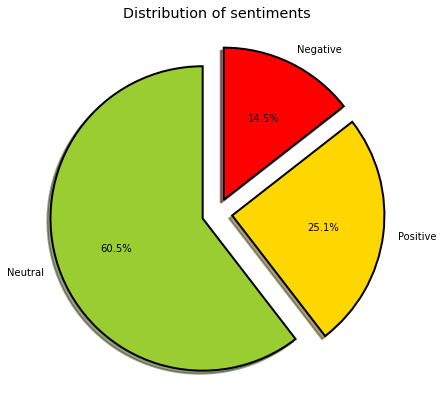

In [16]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.savefig("all_sentiment_distribution_proportion_pie.png")

In [17]:
#Visulaizing Top 5 positive Sentiments
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Team,Tweet,polarity,sentiment
2303,portland_trail_blazers,impressive jaren jackson play 28 foulfree minutes,1.0,Positive
2163,oklahoma_city_thunder,dortchetgiddeyjdubcasonjoe excellent tonight,1.0,Positive
624,indiana_pacers,impressive shot haliburton allen switch toe line,1.0,Positive
2607,utah_jazz,ive impressed zeke nnaji season,1.0,Positive
654,indiana_pacers,best view court shoutout sky deck pictwitterco...,1.0,Positive


In [18]:
# text = ' '.join([word for word in pos_tweets[column_name]])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in positive tweets', fontsize=19)
# plt.show()

In [19]:
#Visualizing Negative Words
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Team,Tweet,polarity,sentiment
2215,phoenix_suns,really nice response suns went 12 still missin...,-1.110223e-17,Negative
1848,memphis_grizzlies,vince williams lot good pieces game needs slow...,-2.775558e-17,Negative
808,dallas_mavericks,look like tonight mavs first inseason tourname...,-4.545455e-03,Negative
246,charlotte_hornets,charlotte huge rest advantage ahead tonights i...,-5.555556e-03,Negative
1356,philadelphia_76ers,durant court embiid resting sixers opened game...,-8.333333e-03,Negative


In [20]:
# text = ' '.join([word for word in neg_tweets['text']])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in negative tweets', fontsize=19)
# plt.show()

In [21]:
#Visualizing Neutral Words
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Team,Tweet,polarity,sentiment
0,atlanta_hawks,pictwittercomgi9nwxsblx,0.0,Neutral
1756,los_angeles_lakers,nov 14 vs mem,0.0,Neutral
1754,los_angeles_lakers,,0.0,Neutral
1753,los_angeles_lakers,heres lakers group tourney schedule,0.0,Neutral
1752,los_angeles_lakers,,0.0,Neutral


In [22]:
# text = ' '.join([word for word in neutral_tweets['text']])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in neutral tweets', fontsize=19)
# plt.show()

In [23]:
text_df

,Team,Tweet,polarity,sentiment
0,atlanta_hawks,pictwittercomgi9nwxsblx,0.00,Neutral
1,atlanta_hawks,ep 284atl 29 hawwwks,0.00,Neutral
2,atlanta_hawks,,0.00,Neutral
3,atlanta_hawks,podcastersspotifycompodshowatlan,0.00,Neutral
4,atlanta_hawks,hawks coming trip provides good barometer ajcc...,0.70,Positive
...,...,...,...,...
2617,utah_jazz,yeah im courts wacky fun,0.40,Positive
2618,utah_jazz,cmon julius randle least try,-0.30,Negative
2619,utah_jazz,really dont know think courts like might love,0.35,Positive
2620,utah_jazz,also might give seizure,0.00,Neutral


## Adding sentiment as a feature to dataset

In [24]:
text_df.to_csv("joint_with_sentiment.csv",index=False)

## More Data Visualization

Plotting the top 5 most positive and most negative sum polarity teams

In [25]:
# Group by NBA team and calculate sum of polarity scores
team_polarity_sum = df.groupby('Team')['polarity'].sum()

# Get the top 5 teams with the highest sum of polarity scores
top_5_teams_pos_teams = team_polarity_sum.nlargest(5)
top_5_teams_neg_teams = team_polarity_sum.nsmallest(5)
print(top_5_teams_pos_teams)
print(top_5_teams_neg_teams)

# Convert top teams to a list
top_5_teams_pos = top_5_teams_pos_teams.index.tolist()
top_5_teams_neg = top_5_teams_neg_teams.index.tolist()

Team
miami_heat           8.949044
indiana_pacers       8.466103
orlando_magic        6.429683
san_antonio_spurs    5.981845
toronto_raptors      5.762731
Name: polarity, dtype: float64
Team
charlotte_hornets     -0.402126
dallas_mavericks      -0.277709
new_york_knicks       -0.243384
milwaukee_bucks        0.476674
cleveland_cavaliers    0.536744
Name: polarity, dtype: float64


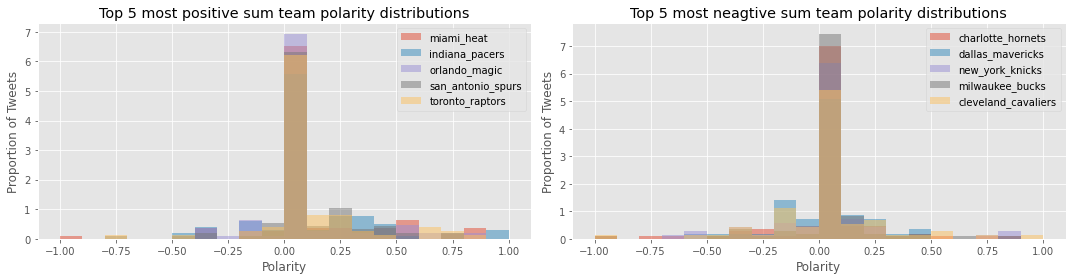

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot histogram with color legend
fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].set_title("Top 5 most positive sum team polarity distributions")
for team in top_5_teams_pos:
    subset = text_df[text_df['Team'] == team]['polarity']
    bins = [round(x * 0.1, 1) for x in range(-10, 11)]
    ax[0].hist(subset, bins=bins, alpha=0.5, density=True, label=team)

ax[0].set_xlabel('Polarity')
ax[0].set_ylabel('Proportion of Tweets')
ax[0].legend()

ax[1].set_title("Top 5 most neagtive sum team polarity distributions")
for team in top_5_teams_neg:
    subset = text_df[text_df['Team'] == team]['polarity']
    bins = [round(x * 0.1, 1) for x in range(-10, 11)]
    ax[1].hist(subset, bins=bins, alpha=0.5, density=True, label=team)

ax[1].set_xlabel('Polarity')
ax[1].set_ylabel('Proportion of Tweets')
ax[1].legend()
plt.tight_layout()
plt.show()
plt.savefig("top_5_teams_most_polar_distributions_bar.png")

Summary of text characteristics of tweets

In [27]:
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

def get_grammatical_features(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    
    # Get word count
    word_count = len(tokens)
    
    # Get character count
    char_count = sum(len(word) for word in tokens)
    
    # Perform part-of-speech tagging
    pos_tags = pos_tag(tokens)
    
    # Count nouns
    num_nouns = len([word for word, pos in pos_tags if pos.startswith('N')])
    
    # Count verbs
    num_verbs = len([word for word, pos in pos_tags if pos.startswith('V')])
    
    # Count adjectives
    num_adjectives = len([word for word, pos in pos_tags if pos.startswith('J')])
    
    # Count adverbs
    num_adverbs = len([word for word, pos in pos_tags if pos.startswith('R')])
    
    # Count pronouns
    num_pronouns = len([word for word, pos in pos_tags if pos.startswith('PRP')])
    
    return {
        'Word Count': word_count,
        'Character Count': char_count,
        'Number of Nouns': num_nouns,
        'Number of Verbs': num_verbs,
        'Number of Adjectives': num_adjectives,
        'Number of Adverbs': num_adverbs,
        'Number of Pronouns': num_pronouns
    }

# Example usage
sentence = "The quick brown fox jumps over the lazy dog."
features = get_grammatical_features(sentence)
print(features)


{'Word Count': 10, 'Character Count': 36, 'Number of Nouns': 3, 'Number of Verbs': 1, 'Number of Adjectives': 2, 'Number of Adverbs': 0, 'Number of Pronouns': 0}


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lx2030/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [28]:
characteristics = {}
for idx, row in text_df.iterrows():
    sentence = row['Tweet']
    features = get_grammatical_features(sentence)
    
    for characteristic, value in features.items():
        if characteristic not in characteristics:
            characteristics[characteristic] = []
        characteristics[characteristic].append(value)

In [29]:
for char in list(characteristics):
    text_df[char] = characteristics[char]

In [30]:
text_df.describe()

,polarity,Word Count,Character Count,Number of Nouns,Number of Verbs,Number of Adjectives,Number of Adverbs,Number of Pronouns
count,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000,2622.000000
mean,0.036860,7.501907,45.167429,3.702136,1.345156,1.154081,0.396262,0.007246
std,0.218110,7.160596,41.869538,3.468855,1.664385,1.544427,0.758340,0.089217
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,35.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,0.010833,11.000000,69.000000,6.000000,2.000000,2.000000,1.000000,0.000000
max,1.000000,43.000000,232.000000,20.000000,9.000000,9.000000,6.000000,2.000000


In [31]:
text_df[text_df["polarity"] < 0].describe()

,polarity,Word Count,Character Count,Number of Nouns,Number of Verbs,Number of Adjectives,Number of Adverbs,Number of Pronouns
count,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,-2.536745e-01,12.424802,71.079156,5.976253,2.303430,2.015831,0.693931,0.002639
std,1.985523e-01,6.739799,39.313744,3.412080,1.735183,1.650641,0.906321,0.051367
min,-1.000000e+00,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.000000e-01,7.000000,42.500000,4.000000,1.000000,1.000000,0.000000,0.000000
50%,-2.000000e-01,11.000000,65.000000,5.000000,2.000000,2.000000,0.000000,0.000000
75%,-1.000000e-01,16.000000,94.000000,8.000000,3.000000,3.000000,1.000000,0.000000
max,-1.110223e-17,39.000000,229.000000,19.000000,9.000000,9.000000,6.000000,1.000000


In [32]:
text_df[text_df["polarity"] > 0].describe()

,polarity,Word Count,Character Count,Number of Nouns,Number of Verbs,Number of Adjectives,Number of Adverbs,Number of Pronouns
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.292995,12.445289,73.577508,5.793313,2.346505,2.343465,0.805471,0.013678
std,0.222312,7.118109,41.808226,3.458801,1.854279,1.708773,0.992437,0.128668
min,0.005556,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,7.000000,42.250000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,0.250000,11.000000,67.000000,5.000000,2.000000,2.000000,1.000000,0.000000
75%,0.400000,16.000000,98.750000,8.000000,3.000000,3.000000,1.000000,0.000000
max,1.000000,43.000000,232.000000,20.000000,9.000000,9.000000,6.000000,2.000000


In [33]:
text_df[text_df["polarity"] == 0].describe()

,polarity,Word Count,Character Count,Number of Nouns,Number of Verbs,Number of Adjectives,Number of Adverbs,Number of Pronouns
count,1585.0,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000,1585.000000
mean,0.0,4.272555,27.177287,2.290221,0.700315,0.454259,0.155205,0.005678
std,0.0,5.157632,31.418618,2.668619,1.177614,0.911117,0.445105,0.075164
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,3.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,7.000000,41.000000,4.000000,1.000000,1.000000,0.000000,0.000000
max,0.0,38.000000,196.000000,19.000000,9.000000,7.000000,5.000000,1.000000


Plots of means and standard deviations of tweet characteristics by polarity group

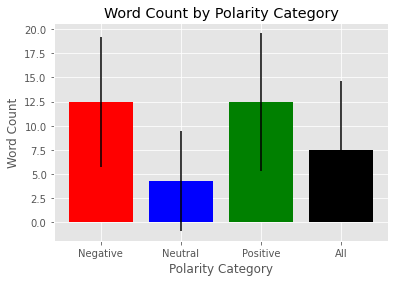

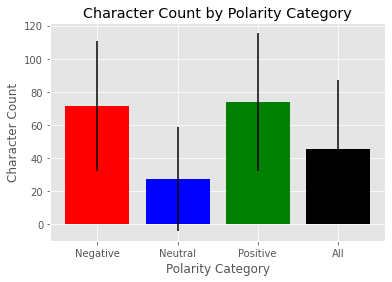

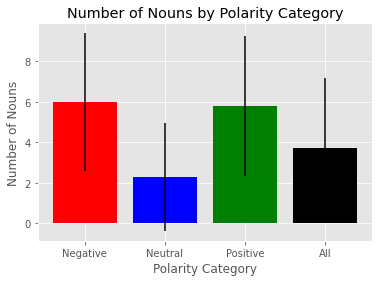

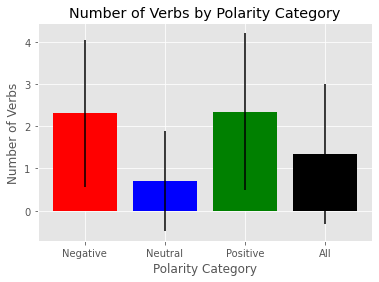

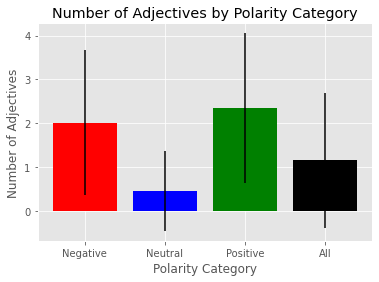

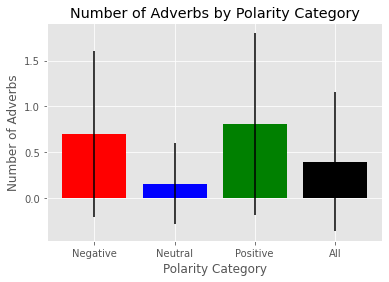

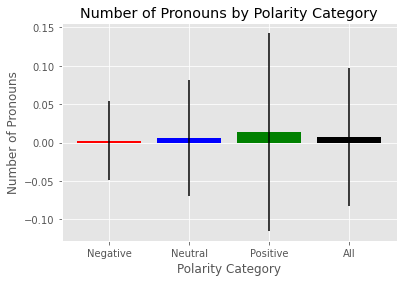

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize polarity
def categorize_polarity(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply categorize_polarity to create a new column 'polarity_category'
text_df['polarity_category'] = df['polarity'].apply(categorize_polarity)

# Get summary statistics for each category
summary = text_df.groupby('polarity_category').describe()

# Define the characteristics you want to plot
characteristics = ['Word Count', 'Character Count', 'Number of Nouns', 
                   'Number of Verbs', 'Number of Adjectives', 'Number of Adverbs', 'Number of Pronouns']

# Define the groups and colors for plotting
groups = ['Negative', 'Neutral', 'Positive', 'All']
colors = ['red', 'blue', 'green', 'black']

# Plot mean and standard deviation for each characteristic
for characteristic in characteristics:
    fig, ax = plt.subplots()
    
    # Create lists to store mean and standard deviation for each group
    means = []
    stds = []
    
    for group in groups:
        # Get mean and standard deviation for the characteristic in each group
        if group == 'All':
            mean = df[characteristic].mean()
            std = df[characteristic].std()
        else:
            mean = summary[characteristic]['mean'][group]
            std = summary[characteristic]['std'][group]
        
        means.append(mean)
        stds.append(std)
    
    # Plot the mean and standard deviation as bars with error bars
    ax.bar(groups, means, yerr=stds, color=colors)
    
    # Set the title and labels
    ax.set_title(f'{characteristic} by Polarity Category')
    ax.set_xlabel('Polarity Category')
    ax.set_ylabel(characteristic)
    
    # Show the plot
    plt.savefig(f'{characteristic}_counts_by_polarity_category_bar_with_ci.png')
    plt.show()
    plt.close()